In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr as R
from sklearn import metrics
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
sns.set(style='whitegrid', font_scale=1.75)

In [3]:
def calc_stats(array1, array2):
    rmse=np.sqrt(np.mean((array1.reshape(-1,1)-array2.reshape(-1,1))**2))
    r, _ = R(array1.ravel(), array2.ravel())
    return rmse, r

In [4]:
def calc_auc(true, pred):
    auc=metrics.roc_auc_score(true.ravel(), pred.ravel())
    fpr, tpr, _ = metrics.roc_curve(true.ravel(), pred.ravel())
    return auc, fpr, tpr

In [5]:
def get_results(listo_files, selection=' pose '):
    initial_results=[]
    for fname in listo_files:
        with open(fname) as infile:
            for line in infile:
                if selection in line:
                    items=line.rstrip().split()
                    rmse=float(items[2])
                    R = float(items[3])
                    auc=float(items[5])
                    top=float(items[-1])
                
                    initial_results.append((rmse,R,auc,top))
    return initial_results

# Analyzing the differences between imputed and not

In [6]:
initial_files=glob.glob('results/it2_retrain_it0/*.summary')
imputed_files=glob.glob('results/it2_imputation_it0/*.summary')
imputed_it1=glob.glob('results/it2_imputation_it1/*.summary')
imputed_it2=glob.glob('results/it2_imputation_it2/*.summary')
imputed_it3=glob.glob('results/it2_imputation_it3/*.summary')
imputed_it4=glob.glob('results/it2_imputation_it4/*.summary')
imputed_it5=glob.glob('results/it2_imputation_it5/*.summary')

imputed_mean_it1=glob.glob('results/it2_mean_imputation_it1/*.summary')
imputed_mean_it2=glob.glob('results/it2_mean_imputation_it2/*.summary')
imputed_mean_it3=glob.glob('results/it2_mean_imputation_it3/*.summary')
imputed_mean_it4=glob.glob('results/it2_mean_imputation_it4/*.summary')
imputed_mean_it5=glob.glob('results/it2_mean_imputation_it5/*.summary')
imputed_mean_it6=glob.glob('results/it2_mean_imputation_it6/*.summary')

In [7]:
first_results=get_results(initial_files)
imputed_100=get_results(imputed_files)

In [8]:
imputed_it1=get_results(imputed_it1)
imputed_it2=get_results(imputed_it2)
imputed_it3=get_results(imputed_it3)
imputed_it4=get_results(imputed_it4)
imputed_it5=get_results(imputed_it5)

imputed_mean_it1=get_results(imputed_mean_it1)
imputed_mean_it2=get_results(imputed_mean_it2)
imputed_mean_it3=get_results(imputed_mean_it3)
imputed_mean_it4=get_results(imputed_mean_it4)
imputed_mean_it5=get_results(imputed_mean_it5)
imputed_mean_it6=get_results(imputed_mean_it6)

In [9]:
with open('results/comparison.csv','w') as outfile:
    outfile.write('Imputation Iteration #,RMSE,R,AUC,Top1,Scoring\n')
    for i,listo in enumerate([first_results,imputed_100,imputed_it1,imputed_it2,imputed_it3,imputed_it4,
                              imputed_it5]):
        for rmse,r,auc,top in listo:
            flag=i
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Individual\n')
    for j,listo in enumerate([first_results,imputed_mean_it1,imputed_mean_it2, imputed_mean_it3,imputed_mean_it4,
                              imputed_mean_it5,imputed_mean_it6]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Ensemble\n')

In [10]:
df=pd.read_csv('results/comparison.csv')

In [11]:
ens=df[df['Scoring']=='Ensemble']
for imp in set(ens['Imputation Iteration #']):
    tmp2=ens[ens['Imputation Iteration #']==imp].mean()
    print(imp, tmp2['RMSE'], tmp2['Top1'])

0 1.4695715892396626 0.47290485545888294
1 1.4531958482196632 0.481335952848723
2 1.4474707314421533 0.48135840583777717
3 1.4502470701317811 0.4779792309851249
4 1.4510799685476925 0.481335952848723
5 1.4507651351785804 0.47813640190850404
6 1.4529431364425578 0.47919169239404996


In [12]:
ens=df[df['Scoring']=='Individual']
for imp in set(ens['Imputation Iteration #']):
    tmp2=ens[ens['Imputation Iteration #']==imp].mean()
    print(imp, tmp2['RMSE'], tmp2['Top1'])

0 1.4695715892396626 0.47290485545888294
1 1.4589159698457894 0.47595846197024977
2 1.4539429090068334 0.48031434184675836
3 1.4539203829067318 0.4757788380578164
4 1.4596156447310855 0.47709233791748523
5 1.4515923984512031 0.47663205164187483
6 1.4565046760926914 0.4768565815324165


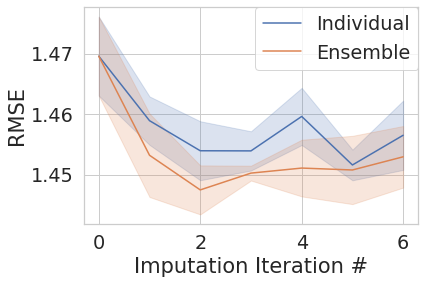

In [13]:
sns.lineplot(data=df,x='Imputation Iteration #',y='RMSE',hue='Scoring',ci='sd')
plt.legend(loc='best',borderaxespad=0,title='')
plt.savefig('figures/InitialImpRMSE.pdf',bbox_inches='tight')

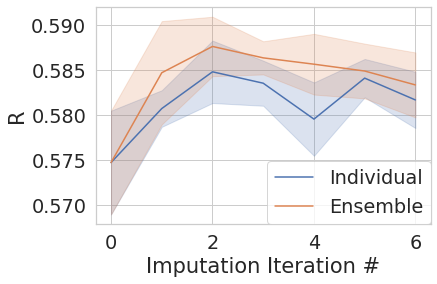

In [14]:
sns.lineplot(data=df,x='Imputation Iteration #',y='R',hue='Scoring',ci='sd')
plt.legend(loc='best',borderaxespad=0,title='')
plt.savefig('figures/InitialImpR.pdf',bbox_inches='tight')

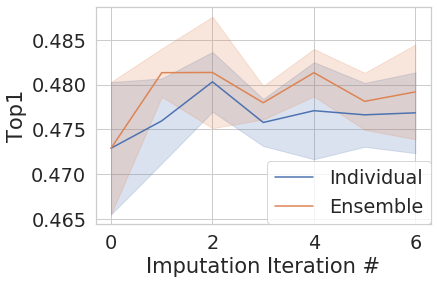

In [15]:
sns.lineplot(data=df,x='Imputation Iteration #',y='Top1',hue='Scoring',ci='sd')
plt.legend(borderaxespad=0,title='',ncol=1,loc='lower right')
plt.savefig('figures/InitialImpTop1.pdf',bbox_inches='tight')

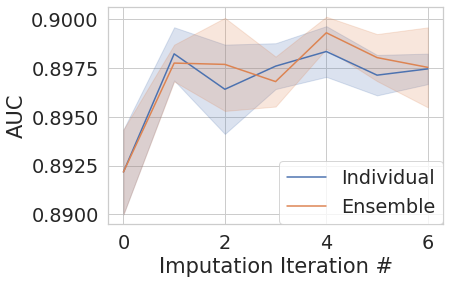

In [16]:
sns.lineplot(data=df,x='Imputation Iteration #',y='AUC',hue='Scoring',ci='sd')
plt.legend(loc='best',borderaxespad=0,title='')
plt.savefig('figures/InitialImpAUC.pdf',bbox_inches='tight')

# Comparing results for the first iteration of the different methods

In [17]:
initial_files=glob.glob('results/it2_retrain_it0/*.summary')
imputed_files=glob.glob('results/it2_imputation_it0/*.summary')
imputed_mean_it1=glob.glob('results/it2_mean_imputation_it1/*.summary')

imputed_med_perpose_it1=glob.glob('results/it2_med_imp_it1/*.summary')
imputed_min_perpose_it1=glob.glob('results/it2_min_imp_it1/*.summary')
imputed_max_perpose_it1=glob.glob('results/it2_max_imp_it1/*.summary')

imputed_med_goodonly_perpose_it1=glob.glob('results/it2_goodonly_med_imp_it1/*.summary')
imputed_min_goodonly_perpose_it1=glob.glob('results/it2_goodonly_min_imp_it1/*.summary')
imputed_max_goodonly_perpose_it1=glob.glob('results/it2_goodonly_max_imp_it1/*.summary')

imputed_med_goodonly_perpose_it2=glob.glob('results/it2_goodonly_med_imp_it2/*.summary')

In [18]:
first_results=get_results(initial_files)
indiv_non_ens=get_results(imputed_files)
indiv_mean_ens=get_results(imputed_mean_it1)

med_perpose_end=get_results(imputed_med_perpose_it1)
min_perpose_end=get_results(imputed_min_perpose_it1)
max_perpose_end=get_results(imputed_max_perpose_it1)

med_goodonly_perpose_end=get_results(imputed_med_goodonly_perpose_it1)
min_goodonly_perpose_end=get_results(imputed_min_goodonly_perpose_it1)
max_goodonly_perpose_end=get_results(imputed_max_goodonly_perpose_it1)

med_goodonly_perpose_end_it2=get_results(imputed_med_goodonly_perpose_it2)

In [19]:
with open('results/Diff_combo_comparison.csv','w') as outfile:
    outfile.write('Imputation Iteration #,RMSE,R,AUC,Top1,Imputation Type\n')
    
    #starting with the individual non-ensemble
    for i,listo in enumerate([first_results,indiv_non_ens]):
        for rmse,r,auc,top in listo:
            flag=i
            outfile.write(f'{flag},{rmse},{r},{auc},{top},Individual\n')
    
    #individual ensembled
    for j,listo in enumerate([first_results,indiv_mean_ens]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Ind_Ens\n')
    
    #Median per-pose ens
    for j,listo in enumerate([first_results,med_perpose_end]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Med_Ens\n')
    
    #median good only ensemble
    for j,listo in enumerate([first_results,med_goodonly_perpose_end,med_goodonly_perpose_end_it2]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Med_GO_Ens\n')
    
    #Max per-pose ens
    for j,listo in enumerate([first_results,max_perpose_end]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Max_Ens\n')
    
    #max good only ensemble
    for j,listo in enumerate([first_results,max_goodonly_perpose_end]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Max_GO_Ens\n')

    #Min per-pose ens
    for j,listo in enumerate([first_results,min_perpose_end]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Min_Ens\n')
            
    #min good only ensemble
    for j,listo in enumerate([first_results,min_goodonly_perpose_end]):
        for rmse,r,auc,top in listo:
            #flag=j+1
            outfile.write(f'{j},{rmse},{r},{auc},{top},Min_GO_Ens\n')

In [20]:
df=pd.read_csv('results/Diff_combo_comparison.csv')

start_mean=df[df['Imputation Type']=='Individual'].mean()

for v in ['RMSE','R','AUC','Top1']:
    val=start_mean[v]
    df[f'Delta {v}']=df[v]-val

In [21]:
list(set(df['Imputation Type']))

['Med_GO_Ens',
 'Ind_Ens',
 'Med_Ens',
 'Min_Ens',
 'Max_GO_Ens',
 'Individual',
 'Max_Ens',
 'Min_GO_Ens']

In [22]:
for key in list(set(df['Imputation Type'])):
    tmp=df[df['Imputation Type']==key]
    print('----')
    print(key)
    for val in ['RMSE','R','AUC','Top1']:
        print(val)
        print(ttest_ind(tmp[tmp['Imputation Iteration #']==0][val], tmp[tmp['Imputation Iteration #']==1][val]))
    print('----')

----
Med_GO_Ens
RMSE
Ttest_indResult(statistic=8.271277900943087, pvalue=3.432221089141901e-05)
R
Ttest_indResult(statistic=-6.054318776728646, pvalue=0.00030445440860517407)
AUC
Ttest_indResult(statistic=-3.177137143773148, pvalue=0.013053606292980864)
Top1
Ttest_indResult(statistic=-0.7307129623176546, pvalue=0.485801295005464)
----
----
Ind_Ens
RMSE
Ttest_indResult(statistic=3.857701619737092, pvalue=0.00482459882868894)
R
Ttest_indResult(statistic=-2.743791557116219, pvalue=0.025300514532092103)
AUC
Ttest_indResult(statistic=-5.2698184507879695, pvalue=0.0007554603394999562)
Top1
Ttest_indResult(statistic=-2.3983575203294674, pvalue=0.043287539378583824)
----
----
Med_Ens
RMSE
Ttest_indResult(statistic=-13.139502612939287, pvalue=1.0708814034048821e-06)
R
Ttest_indResult(statistic=-4.383073604488478, pvalue=0.0023391374497214916)
AUC
Ttest_indResult(statistic=-3.865024292428262, pvalue=0.004774841562484794)
Top1
Ttest_indResult(statistic=-0.9063792728154311, pvalue=0.39121698255781

In [23]:
tmp=df[df['Imputation Type']=='Min_Ens']
tmp[tmp['Imputation Iteration #']==1].mean()

Imputation Iteration #    1.000000
RMSE                      3.138243
R                         0.420735
AUC                       0.897384
Top1                      0.456885
Delta RMSE                1.673999
Delta R                  -0.156980
Delta AUC                 0.002190
Delta Top1               -0.017547
dtype: float64

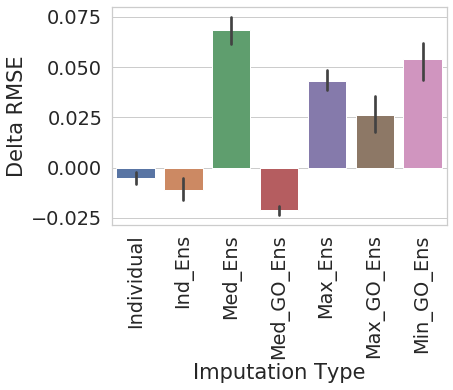

In [24]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Min_Ens')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta RMSE')
plt.xticks(rotation=90)
plt.savefig('figures/ComparingImpStylesRMSE.pdf',bbox_inches='tight')

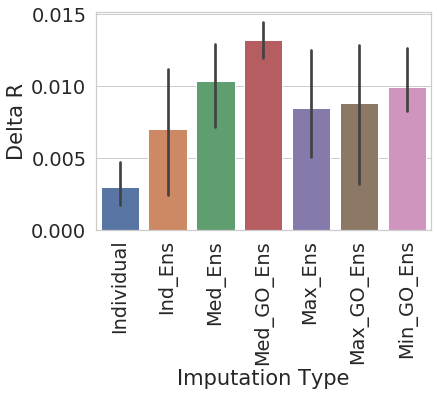

In [25]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Min_Ens')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta R')
plt.xticks(rotation=90)
plt.savefig('figures/ComparingImpStylesR.pdf',bbox_inches='tight')

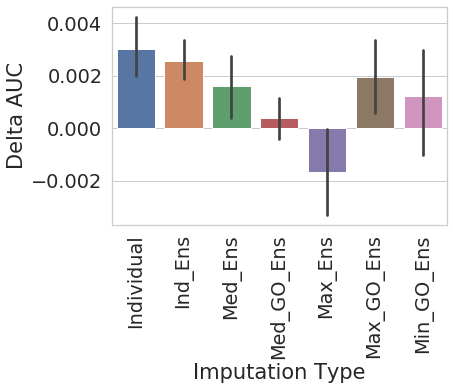

In [26]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Min_Ens')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta AUC')
plt.xticks(rotation=90)
plt.savefig('figures/ComparingImpStylesAUC.pdf',bbox_inches='tight')

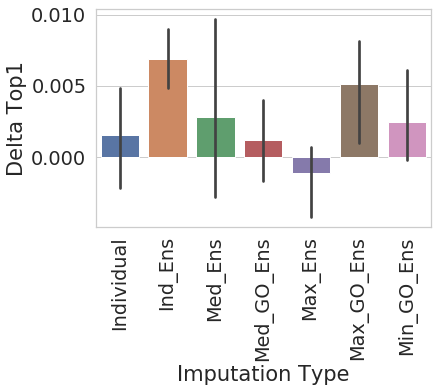

In [27]:
tmp=df[df['Imputation Iteration #']==1]
tmp2=tmp[~(tmp['Imputation Type']=='Min_Ens')]
sns.barplot(data=tmp2, x='Imputation Type',y='Delta Top1')
plt.xticks(rotation=90)
plt.savefig('figures/ComparingImpStylesTop1.pdf',bbox_inches='tight')

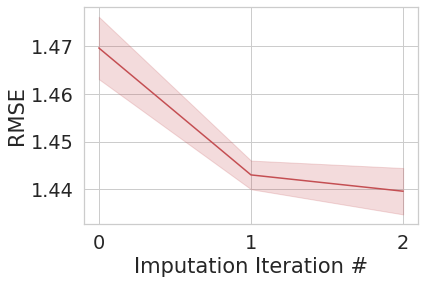

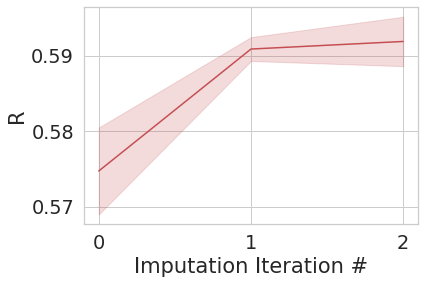

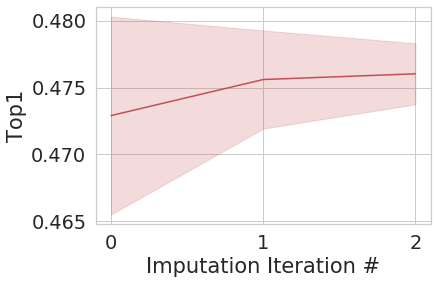

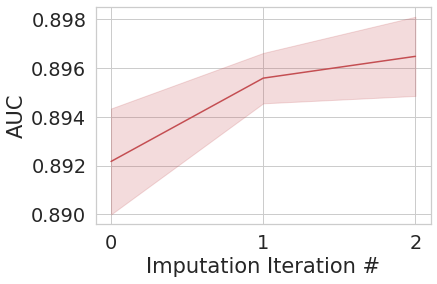

In [28]:
tmp=df[df["Imputation Type"]=='Med_GO_Ens']
sns.lineplot(data=tmp,x='Imputation Iteration #',y='RMSE',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEnsRMSE.pdf',bbox_inches='tight')
plt.show()

sns.lineplot(data=tmp,x='Imputation Iteration #',y='R',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEnsR.pdf',bbox_inches='tight')
plt.show()

sns.lineplot(data=tmp,x='Imputation Iteration #',y='Top1',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEnsTop1.pdf',bbox_inches='tight')
plt.show()

sns.lineplot(data=tmp,x='Imputation Iteration #',y='AUC',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
plt.xticks(ticks=[0,1,2],labels=['0','1','2'])
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEnsAUC.pdf',bbox_inches='tight')
plt.show()

# Invesitgating randomly adding more imputation

In [29]:
initial_files=glob.glob('results/it2_retrain_it0/*.summary') #0% imputed
percent_impute_20=glob.glob('results/it2_goodonly_prog_med_imp_it1/*20pa*.summary')
percent_impute_40=glob.glob('results/it2_goodonly_prog_med_imp_it1/*40pa*.summary')
percent_impute_60=glob.glob('results/it2_goodonly_prog_med_imp_it1/*60pa*.summary')
percent_impute_80=glob.glob('results/it2_goodonly_prog_med_imp_it1/*80pa*.summary')
imputed_med_goodonly_perpose_it1=glob.glob('results/it2_goodonly_med_imp_it1/*.summary') #100% imputed

first_results=get_results(initial_files)
pa20_restuls=get_results(percent_impute_20)
pa40_restuls=get_results(percent_impute_40)
pa60_restuls=get_results(percent_impute_60)
pa80_restuls=get_results(percent_impute_80)
med_goodonly_perpose_end=get_results(imputed_med_goodonly_perpose_it1)

In [30]:
with open('results/percent_imputed_compare_it1.csv','w') as outfile:
    outfile.write('Percent Imputed,RMSE,R,AUC,Top1\n')
    
    #starting with the individual non-ensemble
    for i,listo in enumerate([first_results,pa20_restuls,pa40_restuls,pa60_restuls,pa80_restuls,med_goodonly_perpose_end]):
        for rmse,r,auc,top in listo:
            flag=i*20
            outfile.write(f'{flag},{rmse},{r},{auc},{top}\n')

In [31]:
df=pd.read_csv('results/percent_imputed_compare_it1.csv')

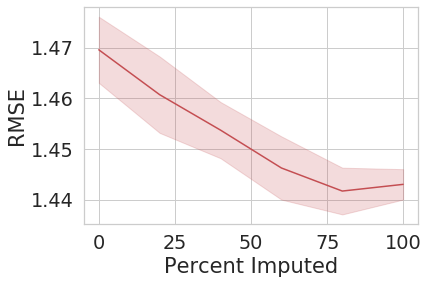

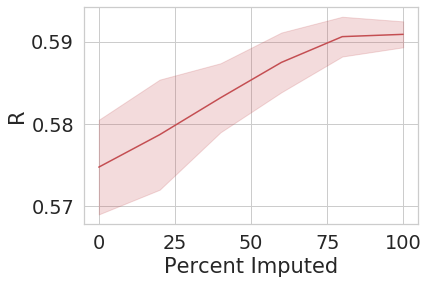

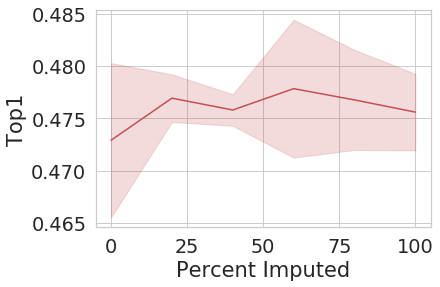

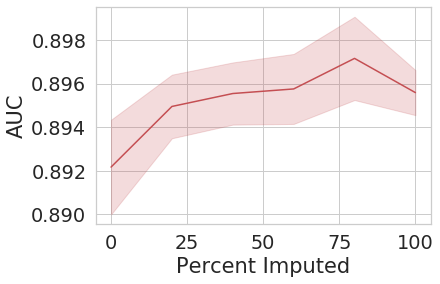

In [32]:
ax=sns.lineplot(data=df,x='Percent Imputed',y='RMSE',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpRMSE.pdf',bbox_inches='tight')
plt.show()

ax=sns.lineplot(data=df,x='Percent Imputed',y='R',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpR.pdf',bbox_inches='tight')
plt.show()

ax=sns.lineplot(data=df,x='Percent Imputed',y='Top1',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpTop1.pdf',bbox_inches='tight')
plt.show()

ax=sns.lineplot(data=df,x='Percent Imputed',y='AUC',ci='sd',color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
#plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
plt.savefig('figures/MedGOEns_addingImpAUC.pdf',bbox_inches='tight')
plt.show()